In [158]:
!pip install --upgrade pandas --user


Requirement already up-to-date: pandas in c:\users\chang\appdata\roaming\python\python38\site-packages (1.1.4)


In [13]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
canvas = pd.read_csv("Original Datasets/canvas_wi20.csv")
roster = pd.read_csv("Original Datasets/roster_wi20.csv")
final = pd.read_csv("Original Datasets/final_grades_wi20.csv")
mid_survey = pd.read_csv("Original Datasets/mid_survey_wi20.csv")
pos_survey = pd.read_csv("Original Datasets/post_survey_wi20.csv")
pre_survey = pd.read_csv("Original Datasets/pre_survey_wi20.csv")
p_views= pd.read_csv("Original Datasets/piazza_views_wi20.csv")
p_stats= pd.read_csv("Original Datasets/piazza_stats_wi20.csv")
section = pd.read_csv('Original Datasets/section_attendance_wi20.csv')

#### recording the rows with total points of zero

In [14]:
final = final.dropna()
to_remove=[]
for ID, points in zip(final['ID'],final['total_points']):
    if (points == 0) & (ID not in to_remove):
        to_remove.append(ID)

In [15]:
final = final[final['total_points']>0] 
final.to_csv('final.csv')
mid_survey = mid_survey.dropna()

#### removing NaN IDs 

In [16]:
roster.dropna(subset=['ID'],inplace=True)
pre_survey.dropna(subset=['ID'],inplace=True)
pos_survey.dropna(subset=['ID'],inplace=True)
mid_survey.dropna(subset=['ID'],inplace=True)
p_views.dropna(subset=['ID'],inplace=True)
p_stats.dropna(subset=['ID'],inplace=True)
canvas.dropna(subset=['ID'],inplace=True)
section.dropna(subset=['ID'],inplace=True)

#### recording the students who have submited two surveys 

In [17]:
dup = []
i= pre_survey.ID.value_counts()

for key in i.keys():
    if i[key] > 1:
        dup.append(key)
        
        
i= mid_survey.ID.value_counts()

for key in i.keys():
    if i[key] > 1:
        dup.append(key)
        
i= pos_survey.ID.value_counts()

for key in i.keys():
    if i[key] > 1:
        dup.append(key)

#### setting ID as the index for better merge

In [18]:
final.set_index('ID',inplace = True)
canvas.set_index('ID',inplace = True)
mid_survey.set_index('ID',inplace = True)
pre_survey.set_index('ID',inplace = True)
pos_survey.set_index('ID',inplace = True)
p_views.set_index('ID',inplace = True)
p_stats.set_index('ID',inplace = True)
roster.set_index('ID',inplace = True)
section.set_index('ID', inplace = True)

#### saving the last recorded survey

In [19]:
pre_dup = pre_survey[pre_survey.index.duplicated(keep='last')]
mid_dup = mid_survey[mid_survey.index.duplicated(keep='last')]
pos_dup = pos_survey[pos_survey.index.duplicated(keep='last')]

#### removing the unwanted rows

In [20]:

for i in to_remove:
    roster = roster[roster.index!= i]
    pre_survey = pre_survey[pre_survey.index!= i]
    mid_survey = mid_survey[mid_survey.index!= i]
    pos_survey = pos_survey[pos_survey.index!= i]
    canvas= canvas[canvas.index!= i]
    p_stats= p_stats[p_stats.index!= i]
    p_views= p_views[p_views.index!= i]

for i in dup:    
    pre_survey = pre_survey[pre_survey.index!= i]
    mid_survey = mid_survey[mid_survey.index!= i]
    pos_survey = pos_survey[pos_survey.index!= i]

#### adding the last recorded survey data back 

In [21]:
pre_survey = pre_survey.append([pre_dup])
mid_survey = mid_survey.append([mid_dup])
pos_survey = pos_survey.append([pos_dup])

#### throwing away useless columns 

In [22]:
roster = roster.drop(['Pronoun','Credits'],axis=1)
p_stats = p_stats.drop(['groups'],axis=1)
section = section.drop(['1','2','3','4','5','6','7','8'],axis=1)

#### adding the number of piazza views per student

In [23]:
temp= dict(p_views.drop(["role"],axis=1).count(axis=1))
df = pd.DataFrame.from_dict(data=temp,orient='index')
p_sum = df.rename({0:'piazza views'}, axis='columns')

#### removing students who have entered the surveys 3 times 

In [24]:
dup = []
i= pos_survey.index.value_counts()

for key in i.keys():
    if i[key] > 1:
        dup.append(key)

pos_dup_dup = pos_dup[pos_dup.index.duplicated(keep='last')]

for i in dup:    
    pos_survey = pos_survey[pos_survey.index!= i]
    
pos_survey = pos_survey.append([pos_dup_dup])


#### combining all the dataframes into one 

In [25]:
merged = pd.merge(final,roster, left_index=True, right_on="ID")
merged = pd.merge(merged, canvas, right_index=True, left_on="ID", how='left')
merged = pd.merge(merged, pre_survey, right_index=True, left_on="ID", how='left')
merged = pd.merge(merged, mid_survey, right_index=True, left_on="ID", how='left')
merged = pd.merge(merged, pos_survey, right_index=True, left_on="ID", how='left')
merged = pd.merge(merged, p_stats['p_stat_sum'], right_index=True, left_on="ID", how='left')
merged = pd.merge(merged, p_sum, right_index=True, left_on="ID", how='left')
merged = pd.merge(merged, section, right_index = True, left_on="ID", how= 'left')

In [26]:
merged = merged.rename({'Grand Total':'section'}, axis='columns')
merged['section'] = merged['section'].fillna(0)#NaN in section meaning zero section attendence 
merged['piazza views'] = merged['piazza views'].fillna(0)
merged['p_stat_sum'] = merged['p_stat_sum'].fillna(0)
merged['hw_t'] = merged['A1_t']+merged['A2_t']+merged['A2_t']+merged['A3_t']+merged['A4_t']+merged['A5_t']+merged['A6_t']

In [27]:
for i in merged.columns:
    print(i)

total_points
letter_grade
College
Major
Level
Quiz: Week 1 (68682)
Quiz: Week 2 (70043)
Quiz: Week 3 (71647)
Quiz: Week 4 (72797)
Quiz: Week 5 (74456)
Quiz: Week 6 (75572)
Quiz: Week 7 (76768)
Quiz: Week 8 (86753)
Quiz: Week 9 (88584)
Lecture Participation (72030)
Pre-Course Survey (EC) (71678)
Mid-Course Survey (EC) (85274)
Post-Course Survey (EC) (85275)
Final Project EC (video) (88590)
A1 (72018)
A2 (72019)
A3 (72020)
A4 (72021)
A5 (72022)
A6 (72023)
A_Section (92843)
Project Proposal (72024)
Project Check-In (72025)
Project Survey (72026)
Final Project (72027)
Guest Lecture 1 (72028)
Guest Lecture 2 (72029)
Which of the following courses have you taken previously? Check all that apply.
In which of the following programming language(s) are you comfortable? Check all that apply.
Which of the following topics are you familiar with? (Here, familiar means you could explain the topic clearly to a friend without Googling it first.) Check all that apply._x
How comfortable are you with stat

#### quantify difficulty 

In [28]:
temp= []
for i in merged["Difficulty: Relative to other courses you've taken at UCSD, COGS 108 is..."]:
    if 'about as difficult as' in str(i):
        temp.append(0)
    elif 'somewhat easier' in str(i):
        temp.append(-0.5)
    elif 'somewhat more difficult' in str(i):
        temp.append(0.5)
    elif 'way easier' in str(i):
        temp.append(-1)
    elif 'way more difficult' in str(i):
        temp.append(1)
    else:
        temp.append(i) 
merged['difficulty']=temp


temp= []
for i in merged["Workload: Relative to other courses you've taken at UCSD, COGS 108 is..."]:
    if 'about the same' in str(i):
        temp.append(0)
    elif 'somewhat less work' in str(i):
        temp.append(-0.5)
    elif 'somewhat more work' in str(i):
        temp.append(0.5)
    elif 'way less work than' in str(i):
        temp.append(-1)
    elif 'way more work' in str(i):
        temp.append(1)
    else:
        temp.append(i) 
merged['workload']=temp

# prior experience analysis

#### counting the number of topics and languages they knew prior to cogs108 

In [29]:
temp = merged['Which of the following topics are you familiar with? (Here, familiar means you could explain the topic clearly to a friend without Googling it first.) Check all that apply._x']

temp_d={}
for value,key in zip(temp,merged.index):

    store = 0 
    if str(value) == 'nan' :
        store = np.nan
    
    if "data" in str(value):
        store += 1

    if "version control" in str(value):
        store += 1 
        
    if "GitHub" in str(value):
        store += 1 
        
    if "Python" in str(value):
        store += 1 
        
    if "Jupyter" in str(value):
        store += 1 
        
    if "JSON" in str(value):
        store += 1 
        
    if "tabular" in str(value):
        store += 1 
        
    if "machine" in str(value):
        store += 1 
        
    if "confounding" in str(value):
        store += 1 
        
    if "p-value" in str(value):
        store += 1 
        
    if "p-hacking" in str(value):
        store += 1 
        
    if "sentiment" in str(value):
        store += 1 
        
    if "geospatial" in str(value):
        store += 1 
        
    if "pandas" in str(value):
        store += 1 

    if "sklearn" in str(value):
        store += 1 
        
    if "testing" in str(value):
        store += 1 
    temp_d[key] =store
df = pd.DataFrame.from_dict(data=temp_d,orient='index')
pre_ex = df.rename({0:'number of subjects learned '}, axis='columns')

In [30]:
experience = pd.merge(pre_ex,merged['How comfortable are you with programming?_x'], left_index=True, right_on="ID")
experience = pd.merge(experience,merged['How comfortable are you with statistics?_x'], left_index=True, right_on="ID")

In [31]:
temp = merged['Which of the following courses have you taken previously? Check all that apply.']
temp_d={}
for value,key in zip(temp,merged.index):

    store = 0 
    if "COGS 9" in str(value):
        store += 1
        
    if "COGS 18" in str(value):
        store += 1

    if str(value) == 'NA' :
        store = 0
        
    temp_d[key] = store
    
df = pd.DataFrame.from_dict(data=temp_d,orient='index')
df
pre_ex = df.rename({0:'classes'}, axis='columns')

experience = pd.merge(experience,pre_ex, left_index=True, right_on=pre_ex.index)

In [32]:
experience = experience.drop(["key_0"],axis=1)

In [33]:
temp = merged['In which of the following programming language(s) are you comfortable? Check all that apply.']
temp_d={}
for value,key in zip(temp,merged.index):

    store = 0 
    if "Jave" in str(value):
        store += 1
        
    if "Python" in str(value):
        store += 1

    if "R" in str(value):
        store += 1
        
    if "MATLAB" in str(value):
        store += 1
        
    
    temp_d[key] = store
    
df = pd.DataFrame.from_dict(data=temp_d,orient='index')
pre_ex = df.rename({0:'lanuage'}, axis='columns')

experience = pd.merge(experience,pre_ex, left_index=True, right_on=pre_ex.index)
experience = experience.drop(["key_0"],axis=1)

In [34]:
experience = pd.merge(experience,merged['total_points'], left_index=True, right_on=pre_ex.index)
experience = experience.drop(["key_0"],axis=1)

In [35]:
experience_array = np.array(experience.dropna())
experience_array.shape

(293, 6)

### deleting the ones have missing surveys 

In [36]:
experience_dropna = experience.dropna()

#### checking the correlation coefficents between catagories of prior experiences and total scores

In [37]:
from scipy.stats import pearsonr

r,_ = pearsonr(experience_dropna['number of subjects learned '],experience_dropna['total_points'])
print('correlation between subject and points:',r)

r,_ = pearsonr(experience_dropna['How comfortable are you with programming?_x'],experience_dropna['total_points'])
print('correlation between how comfortable students with programing and points:',r)

r,_ = pearsonr(experience_dropna['How comfortable are you with statistics?_x'],experience_dropna['total_points'])
print('correlation between how comfortable students with statistics and points:',r)

r,_ = pearsonr(experience_dropna['classes'],experience_dropna['total_points'])
print('correlation between how many classes students took and points:',r)

r,_ = pearsonr(experience_dropna['lanuage'],experience_dropna['total_points'])
print('correlation between how many language students knew and points:',r)

correlation between subject and points: 0.13505637810190096
correlation between how comfortable students with programing and points: 0.2465000117199603
correlation between how comfortable students with statistics and points: 0.06951722957134995
correlation between how many classes students took and points: 0.08218074080190335
correlation between how many language students knew and points: 0.13773260354298517


#### here I added weights to each feature and calculated the sum. 

In [38]:
experience_array = np.array(experience_dropna)

import sklearn 
from sklearn import linear_model as lm
ols = lm.LinearRegression()
model = ols.fit(experience_array[:,0:-1],experience_array[:,-1])
weighted_ex = np.dot(experience_array[:,0:-1],model.coef_.transpose()) 
r,_ = pearsonr(weighted_ex,experience_dropna['total_points'])
print('correlation between a weighted summation of all previous experience features and points:',r)

correlation between a weighted summation of all previous experience features and points: 0.28249619152654715


### Here I have found that there is little to no correlation between previous experience and a total score. 

### the correlation between each feature and total grade points are very small, even with added weights. Therefore, this confirms that a clustering analysis would be provide us with more info. 

# Time spent on homework assignment 

#### creating a new dataframe just for the time spent on homework 

In [39]:
hw_time = pd.merge(merged['A1_t'],merged['A2_t'], left_index=True, right_on="ID")
hw_time = pd.merge(hw_time,merged['A3_t'], left_index=True, right_on="ID")
hw_time = pd.merge(hw_time,merged['A4_t'], left_index=True, right_on="ID")
hw_time = pd.merge(hw_time,merged['A5_t'], left_index=True, right_on="ID")
hw_time = pd.merge(hw_time,merged['A6_t'], left_index=True, right_on="ID")
hw_time = pd.merge(hw_time,merged['total_points'], left_index=True, right_on="ID")
hw_time.dropna(inplace=True)
np.array(hw_time).shape

(212, 7)

In [40]:
hw_time_sum = np.dot(np.array(hw_time)[:,0:-1],np.ones(6))

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation between hour spent on hw and points: -0.28348117657397465


Text(0, 0.5, 'total grades')

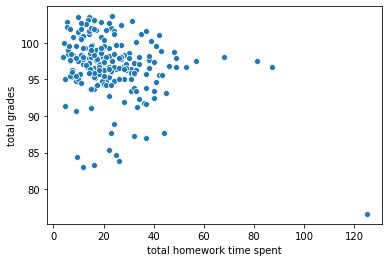

In [42]:
sns.scatterplot(hw_time_sum,np.array(hw_time)[:,-1])
r,_ = pearsonr(hw_time_sum,np.array(hw_time)[:,-1])
print('correlation between hour spent on hw and points:',r)
plt.xlabel('total homework time spent')
plt.ylabel('total grades')

## K mean (test)


In [43]:
exp_km_data = pd.merge(experience,hw_time, left_index=True, right_on="ID")
exp_km_data = pd.merge(exp_km_data,merged['Final Project (72027)'], left_index=True, right_on="ID")
exp_km_data.drop(['total_points_x'], axis=1, inplace=True)
exp_km_data.dropna(inplace=True)
exp_km_arr = np.array(exp_km_data)
exp_km_arr.shape

(181, 13)

In [44]:
from sklearn.cluster import KMeans

In [45]:
kmeans_model = KMeans(n_clusters=3, n_init = 20).fit(exp_km_arr[:,0:-1])
labels = kmeans_model.labels_

In [46]:
labels

array([1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1,
       1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1,
       2, 1, 2, 1, 2])

In [47]:
exp_km_data['label']= labels

cluster 1 are all the outliers;thus, cluster 1 served no purpose.  normalization will fix this problem and cluster more evenly. 

#### normalization by dividing every cell by its columns' maxmium 

In [48]:
exp_km_data.drop(['label'], axis=1,inplace=True)

exp_km_data.columns

Index(['number of subjects learned ',
       'How comfortable are you with programming?_x',
       'How comfortable are you with statistics?_x', 'classes', 'lanuage',
       'A1_t', 'A2_t', 'A3_t', 'A4_t', 'A5_t', 'A6_t', 'total_points_y',
       'Final Project (72027)'],
      dtype='object')

In [49]:
temp = []
for col in exp_km_data.columns[:-2]:
    temp.append((np.array(exp_km_data[col])-exp_km_data[col].mean())/exp_km_data[col].max())

    
exp_km_array_norm = np.concatenate((temp[0], temp[1]), axis=0)
for i in temp[2:]:
    exp_km_array_norm = np.concatenate((exp_km_array_norm,i), axis=0)
    
exp_km_array_n = exp_km_array_norm.reshape(181, 11,order='F')

###  clustering without total points and final project score

In [50]:
kmeans_model = KMeans(n_clusters=3, n_init = 20).fit(exp_km_array_n)
labels = kmeans_model.labels_

In [51]:
exp_km_data['label']= labels

### average total grade points in each cluster


In [52]:
exp_km_data[exp_km_data['label']==0]['total_points_y'].mean(axis=0)

97.81353658536584

In [53]:
exp_km_data[exp_km_data['label']==1]['total_points_y'].mean(axis=0)

95.89076923076921

In [54]:
exp_km_data[exp_km_data['label']==2]['total_points_y'].mean(axis=0)

96.80716666666667

### average time spent on homework in each cluster

In [55]:
exp_km_data['hw time sum'] =exp_km_data['A1_t']+exp_km_data['A2_t']+exp_km_data['A3_t']+exp_km_data['A4_t']+exp_km_data['A5_t']+exp_km_data['A6_t']

In [56]:
exp_km_data[exp_km_data['label']==0]['hw time sum'].mean(axis=0)

13.724390243902441

In [57]:
exp_km_data[exp_km_data['label']==1]['hw time sum'].mean(axis=0)

37.43589743589744

In [58]:
exp_km_data[exp_km_data['label']==2]['hw time sum'].mean(axis=0)

25.279166666666665

### average total project grades in each clusters

In [59]:
exp_km_data[exp_km_data['label']==0]['Final Project (72027)'].mean(axis=0)

23.414390243902435

In [60]:
exp_km_data[exp_km_data['label']==1]['Final Project (72027)'].mean(axis=0)

23.226410256410258

In [61]:
exp_km_data[exp_km_data['label']==2]['Final Project (72027)'].mean(axis=0)

23.292500000000004

# PCA   (test)

In [62]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

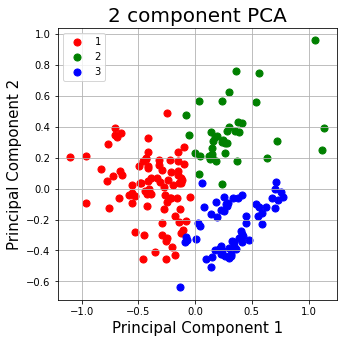

In [63]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(exp_km_array_n)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, pd.Series(exp_km_data['label']).reset_index(drop=True)], axis = 1)

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = (finalDf['label'] == target)
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(np.array(targets)+1)
ax.grid()

In [64]:
pca = PCA()
pca.fit(exp_km_array_n)
pca.components_[0],exp_km_data.columns[0:11]

(array([-0.47481543, -0.31234319, -0.27656331, -0.19142874, -0.49053289,
         0.29751923,  0.29884416,  0.29735352,  0.12817781,  0.1383192 ,
         0.14639296]),
 Index(['number of subjects learned ',
        'How comfortable are you with programming?_x',
        'How comfortable are you with statistics?_x', 'classes', 'lanuage',
        'A1_t', 'A2_t', 'A3_t', 'A4_t', 'A5_t', 'A6_t'],
       dtype='object'))

### changing number of clusters to four

In [83]:
kmeans_model = KMeans(n_clusters=4, n_init = 20).fit(exp_km_array_n)
labels = kmeans_model.labels_
exp_km_data['label']= labels
exp_km_data.columns

Index(['number of subjects learned ',
       'How comfortable are you with programming?_x',
       'How comfortable are you with statistics?_x', 'classes', 'lanuage',
       'A1_t', 'A2_t', 'A3_t', 'A4_t', 'A5_t', 'A6_t', 'total_points_y',
       'Final Project (72027)', 'label', 'hw time sum'],
      dtype='object')

#### Adding a four cluster, it becomes clear that k-mean clustering is using the x,y axis of the two compoent PCA as the boundaries for clustering. Only a couple points crossed the boundaries indicating there might be another priciple component that has a salient explanatary power.  

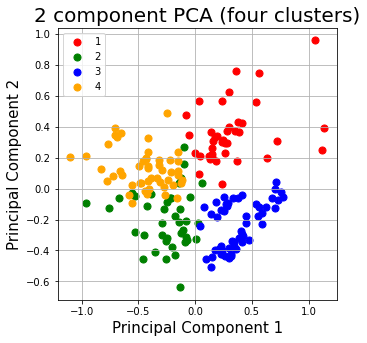

In [66]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(exp_km_array_n)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, pd.Series(exp_km_data['label']).reset_index(drop=True)], axis = 1)

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA (four clusters)', fontsize = 20)
targets = [0, 1, 2,3]
colors = ['r', 'g', 'b','orange']
for target, color in zip(targets,colors):
    indicesToKeep = (finalDf['label'] == target)
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(np.array(targets)+1)
ax.grid()

### After running a scree plot, it becomes evident that the first two principle component explains about 61% of the variance in the data, which is not terrible. By adding the third component, the 3 principle components are able to explain more than 70% of the variance. (~73%) 

In [67]:
pca.explained_variance_ratio_[0:3].sum()

0.6135135001078691

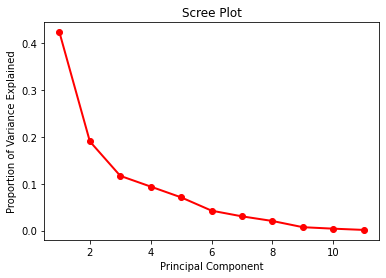

In [68]:
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(exp_km_array_n)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [69]:
pca.explained_variance_ratio_[0:3].sum()

0.7301940587829471

## Clustering and PCA more varibles with summed up homework time 

# useful data 

In [70]:
data_useful = pd.merge(merged['piazza views'],merged['hw_t'], left_index=True, right_on="ID")
data_useful = pd.merge(data_useful,merged['section'], left_index=True, right_on="ID")
data_useful = pd.merge(data_useful,merged['p_stat_sum'], left_index=True, right_on="ID")
data_useful = pd.merge(data_useful,merged['difficulty'], left_index=True, right_on="ID")
data_useful = pd.merge(data_useful,merged['workload'], left_index=True, right_on="ID")
data_useful = pd.merge(data_useful,merged['project_t'], left_index=True, right_on="ID")
data_useful = pd.merge(data_useful,experience, left_index=True, right_on="ID")
data_useful = pd.merge(data_useful,merged['Major'], left_index=True, right_on="ID")
data_useful = pd.merge(data_useful,merged['Level'], left_index=True, right_on="ID")

# exp_km_data.drop(['total_points_x'], axis=1, inplace=True)
data_useful.dropna(inplace=True)
data_useful_array = np.array(data_useful)
data_useful.shape , data_useful.columns


((181, 15),
 Index(['piazza views', 'hw_t', 'section', 'p_stat_sum', 'difficulty',
        'workload', 'project_t', 'number of subjects learned ',
        'How comfortable are you with programming?_x',
        'How comfortable are you with statistics?_x', 'classes', 'lanuage',
        'total_points', 'Major', 'Level'],
       dtype='object'))

#### normalization 

In [71]:
temp = []
for col in data_useful.columns[0:13]:
    temp.append((np.array(data_useful[col])-data_useful[col].mean())/data_useful[col].max())
    
data_useful_array_norm = np.concatenate((temp[0], temp[1]), axis=0)
for i in temp[2:]:
    data_useful_array_norm = np.concatenate((data_useful_array_norm,i), axis=0)
    
data_useful_array_n = data_useful_array_norm.reshape(181, 13,order='F')

In [72]:
kmeans_model = KMeans(n_clusters=4, n_init = 20).fit(data_useful_array_n)
labels = kmeans_model.labels_
data_useful['label']=labels

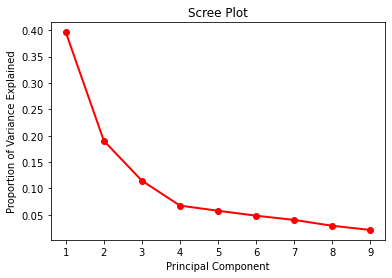

(None, 0.7687100918536577)

In [73]:
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(data_useful_array_n)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show(),pca.explained_variance_ratio_[0:4].sum()

Goal here is to identify the most important factors that would determine the clusters. 

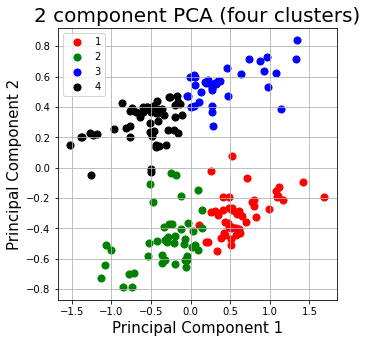

In [74]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_useful_array_n[:,0:-1])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, pd.Series(data_useful['label']).reset_index(drop=True)], axis = 1)

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA (four clusters)', fontsize = 20)
targets = [0, 1, 2,3]
colors = ['r', 'g', 'b','black']
for target, color in zip(targets,colors):
    indicesToKeep = (finalDf['label'] == target)
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(np.array(targets)+1)
ax.grid()

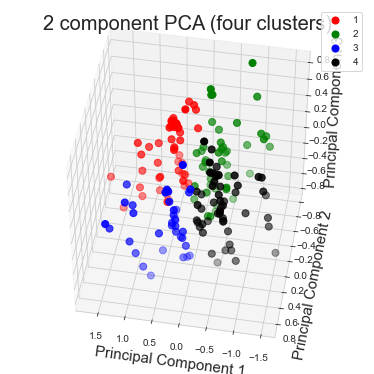

In [75]:
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})


pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data_useful_array_n)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

finalDf = pd.concat([principalDf, pd.Series(data_useful['label']).reset_index(drop=True)], axis = 1)

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax = Axes3D(fig)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA (four clusters)', fontsize = 20)
targets = [0, 1, 2,3]
colors = ['r', 'g', 'b','black']
for target, color in zip(targets,colors):
    indicesToKeep = (finalDf['label'] == target)
    ax.scatter(xs = finalDf.loc[indicesToKeep, 'principal component 1']
               , ys = finalDf.loc[indicesToKeep, 'principal component 2']
               , zs = finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(np.array(targets)+1)
ax.grid()
ax.view_init(45, 100)


PCA loading, weights

Y axis as feature
x axis as clusters
box plot
most common majors in clusters, others...


In [76]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(data_useful_array_n)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3','PC4'], index= data_useful.columns[0:13])
loading_matrix['sum']= loading_matrix['PC1']+loading_matrix['PC2']+loading_matrix['PC3']
loading_matrix

,PC1,PC2,PC3,PC4,sum
piazza views,-0.006726,-0.024458,-0.040844,0.141305,-0.072028
hw_t,0.076255,-0.009657,0.011305,0.020522,0.077903
section,0.140531,-0.409762,-0.021099,-0.032230,-0.290331
p_stat_sum,0.010602,-0.004343,-0.020971,0.034626,-0.014712
difficulty,0.382666,0.094127,-0.062148,0.051940,0.414645
workload,0.385277,0.070201,-0.085313,-0.097595,0.370166
project_t,0.026319,-0.018783,0.001268,0.022166,0.008804
number of subjects learned,-0.152433,0.011937,-0.139839,-0.019985,-0.280336
How comfortable are you with programming?_x,-0.137493,0.016116,-0.010358,-0.067873,-0.131734
How comfortable are you with statistics?_x,-0.078875,0.016788,-0.064239,-0.072499,-0.126326


In [77]:
data_useful[data_useful['label']==1]['total_points'].mean(axis=0)

98.36488372093025

In [78]:
data_useful[data_useful['label']==2]['total_points'].mean(axis=0)

95.79542857142856

In [79]:
data_useful[data_useful['label']==3]['total_points'].mean(axis=0)

96.81185185185183

In [80]:
data_useful[data_useful['label']==0]['total_points'].mean(axis=0)

97.11244897959182

Storing each cluster into seperate CSV files for furthur analysis

In [81]:
data_useful[data_useful['label']==0].to_csv('clusters/cluster0.csv')
data_useful[data_useful['label']==1].to_csv('clusters/cluster1.csv')
data_useful[data_useful['label']==2].to_csv('clusters/cluster2.csv')
data_useful[data_useful['label']==3].to_csv('clusters/cluster3.csv')